# One-Hot Encoding
## 이벤트 One-Hot Encoding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
racks_f_total_df = pd.read_csv(r'./racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [4]:
racks_f_total_df['Time'] = pd.to_datetime(racks_f_total_df['Time'])

In [5]:
racks_f_total_df['EvtVnd1'].unique()

array([nan, "['Under Cell Voltage Fault']",
       "['Over Module Temperature Difference Fault']",
       "['Over Cell Voltage Difference Fault']",
       "['Over Cell Voltage Fault', 'Under Cell Voltage Fault', 'Over Module Temperature Fault', 'Under Module Temperature Fault', 'Over Module Temperature Difference Fault']"],
      dtype=object)

In [6]:
racks_f_total_df['EvtVnd2'].unique()

array([nan, "['Disconnect Switch Feedback Error']",
       "['Comm. Error with MBMSs']",
       "['Comm. Error with the BSC', 'Comm. Error with MBMSs']",
       "['Comm. Error with the BSC']",
       "['Comm. Error with MBMSs', 'Temperature Sensing Error', 'Fan Feedback Error', 'MBMS OBD Error', 'Over Cell Voltage 2nd Fault']",
       "['Comm. Error with MBMSs', 'Temperature Sensing Error', 'MBMS OBD Error', 'Over Cell Voltage 2nd Fault']",
       "['Comm. Error with MBMSs', 'Temperature Sensing Error', 'MBMS OBD Error', 'Over Cell Voltage 2nd Fault', 'BPU Fan Alarm']"],
      dtype=object)

In [7]:
racks_f_total_df['EvtVnd3'].unique()

array([nan, "['Over Module Temperature Difference Warning']",
       "['Over Cell Voltage Difference Warning']",
       "['Under Cell Voltage Warning']",
       "['Over Cell Voltage Difference Warning', 'Over Module Temperature Difference Warning']",
       "['Over Cell Voltage Warning', 'Under Cell Voltage Warning', 'Over Cell Voltage Deviation Warning(Module)', 'Over Module Temperature Warning', 'Over Module Temperature Difference Warning', 'Over Cell Voltage Deviation Warning(Rack)']"],
      dtype=object)

In [8]:
list(map(lambda x: x.strip()[1:-1], "['Over Cell Voltage Difference Warning', 'Over Module Temperature Difference Warning']"[1:-1].split(',')))

['Over Cell Voltage Difference Warning',
 'Over Module Temperature Difference Warning']

In [9]:
evtVnd_set = set()
for i in range(1, 4):
    for evts in racks_f_total_df[f'EvtVnd{i}'].unique()[1:]:
        for evt in map(lambda x: x.strip()[1:-1], evts[1:-1].split(',')):
            evtVnd_set.add(evt)

In [10]:
evt_df = racks_f_total_df[racks_f_total_df['EvtVnd1'].notna() | racks_f_total_df['EvtVnd2'].notna() | racks_f_total_df['EvtVnd3'].notna()]

In [11]:
evtVnd_set

{'BPU Fan Alarm',
 'Comm. Error with MBMSs',
 'Comm. Error with the BSC',
 'Disconnect Switch Feedback Error',
 'Fan Feedback Error',
 'MBMS OBD Error',
 'Over Cell Voltage 2nd Fault',
 'Over Cell Voltage Deviation Warning(Module)',
 'Over Cell Voltage Deviation Warning(Rack)',
 'Over Cell Voltage Difference Fault',
 'Over Cell Voltage Difference Warning',
 'Over Cell Voltage Fault',
 'Over Cell Voltage Warning',
 'Over Module Temperature Difference Fault',
 'Over Module Temperature Difference Warning',
 'Over Module Temperature Fault',
 'Over Module Temperature Warning',
 'Temperature Sensing Error',
 'Under Cell Voltage Fault',
 'Under Cell Voltage Warning',
 'Under Module Temperature Fault'}

In [12]:
evt_one_hot_df = racks_f_total_df.loc[:, ['Time', 'Racks', 'EvtVnd1', 'EvtVnd2', 'EvtVnd3']]

In [13]:
def temp(x):
    if type(x) == float:
        return x
    return list(map(lambda i: i.strip()[1:-1], x[1:-1].split(',')))

In [14]:
evt_one_hot_df['EvtVnd1'] = evt_one_hot_df['EvtVnd1'].apply(temp)

In [15]:
type(evt_one_hot_df['EvtVnd1'][evt_one_hot_df['EvtVnd1'].notna()].iloc[0])

list

In [16]:
evt_one_hot_df = evt_df.loc[:, ['Time', 'Racks', 'EvtVnd1', 'EvtVnd2', 'EvtVnd3']]

In [17]:
for i in range(1, 4):
    evt_one_hot_df[f'EvtVnd{i}'] = evt_one_hot_df[f'EvtVnd{i}'].apply(lambda evtVnd: list(map(lambda x: x.strip()[1:-1], evtVnd[1:-1].split(','))) if type(evtVnd) != float else [] )

In [18]:
evt_one_hot_df

,Time,Racks,EvtVnd1,EvtVnd2,EvtVnd3
19182,2019-01-14 08:29:00,racks_0,[],[],[Over Module Temperature Difference Warning]
19183,2019-01-14 08:30:00,racks_0,[],[],[Over Module Temperature Difference Warning]
19184,2019-01-14 08:31:00,racks_0,[],[],[Over Module Temperature Difference Warning]
19185,2019-01-14 08:32:00,racks_0,[],[],[Over Module Temperature Difference Warning]
19186,2019-01-14 08:33:00,racks_0,[],[],[Over Module Temperature Difference Warning]
...,...,...,...,...,...
5279792,2019-08-30 19:32:00,racks_13,[Under Cell Voltage Fault],[Comm. Error with MBMSs],[Under Cell Voltage Warning]
5279793,2019-08-30 19:33:00,racks_13,[Under Cell Voltage Fault],[Comm. Error with MBMSs],[Under Cell Voltage Warning]
5279794,2019-08-30 19:34:00,racks_13,[Under Cell Voltage Fault],[Comm. Error with MBMSs],[Under Cell Voltage Warning]
5279795,2019-08-30 19:35:00,racks_13,[Under Cell Voltage Fault],[Comm. Error with MBMSs],[Under Cell Voltage Warning]


In [19]:
for evt in evtVnd_set:
    evt_one_hot_df[evt] = (evt_one_hot_df['EvtVnd1'] + evt_one_hot_df['EvtVnd2'] + evt_one_hot_df['EvtVnd3']).apply(lambda x: int(evt in x))

In [22]:
evt_one_hot_df = evt_one_hot_df.drop(['EvtVnd1', 'EvtVnd2', 'EvtVnd3'], axis=1)

In [23]:
evt_one_hot_df

,Time,Racks,Temperature Sensing Error,Fan Feedback Error,Comm. Error with MBMSs,BPU Fan Alarm,Over Module Temperature Difference Fault,Over Module Temperature Fault,MBMS OBD Error,Over Cell Voltage Difference Warning,...,Over Cell Voltage Difference Fault,Over Cell Voltage 2nd Fault,Under Cell Voltage Warning,Over Cell Voltage Deviation Warning(Rack),Over Cell Voltage Fault,Disconnect Switch Feedback Error,Under Cell Voltage Fault,Over Module Temperature Warning,Comm. Error with the BSC,Over Cell Voltage Deviation Warning(Module)
19182,2019-01-14 08:29:00,racks_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19183,2019-01-14 08:30:00,racks_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19184,2019-01-14 08:31:00,racks_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19185,2019-01-14 08:32:00,racks_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19186,2019-01-14 08:33:00,racks_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279792,2019-08-30 19:32:00,racks_13,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5279793,2019-08-30 19:33:00,racks_13,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5279794,2019-08-30 19:34:00,racks_13,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5279795,2019-08-30 19:35:00,racks_13,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
target_evt_list = [
    'Over Cell Voltage Difference Fault',
    'Over Cell Voltage Difference Warning',
    'Over Module Temperature Difference Fault',
    'Over Module Temperature Difference Warning',
    'Under Cell Voltage Fault',
    'Under Cell Voltage Warning',
]

In [45]:
target_columns_list = [ 
    'Time', 'Racks', 'Tmp', 'TmpMax', 'TmpMin', 'VCell', 'VCellMax', 'VCellMin',  
    'A', 'EvtVnd1', 'EvtVnd2', 'EvtVnd3', 'SoC'
]

In [46]:
df = racks_f_total_df.loc[:, target_columns_list]

In [47]:
def change_evtVnd2list(df):
    for i in range(1, 4):
        df[f'EvtVnd{i}'] = df[f'EvtVnd{i}'].apply(
            lambda evtVnd:
                list(map(lambda x: x.strip()[1:-1], evtVnd[1:-1].split(','))) if type(evtVnd) != float else []
        )
    return df

In [48]:
df = change_evtVnd2list(df)

In [49]:
df.head()

,Time,Racks,Tmp,TmpMax,TmpMin,VCell,VCellMax,VCellMin,A,EvtVnd1,EvtVnd2,EvtVnd3,SoC
0,2019-01-01 00:00:00,racks_0,27.0,29.0,25.0,3.435,3.456,3.401,0.0,[],[],[],4.5
1,2019-01-01 00:01:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.400,0.0,[],[],[],4.5
2,2019-01-01 00:02:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.401,0.0,[],[],[],4.5
3,2019-01-01 00:03:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.401,0.0,[],[],[],4.5
4,2019-01-01 00:04:00,racks_0,26.5,29.0,24.5,3.435,3.456,3.400,0.0,[],[],[],4.5


In [50]:
def evtVnd_onehot(df, target_evt_list):
    for evt in target_evt_list:
        df[evt] = (df['EvtVnd1'] + df['EvtVnd2'] + df['EvtVnd3']).apply(lambda x: int(evt in x))

    df = df.drop(['EvtVnd1', 'EvtVnd2', 'EvtVnd3'], axis=1)
    
    return df

In [51]:
df = evtVnd_onehot(df, target_evt_list)

In [52]:
df.head()

,Time,Racks,Tmp,TmpMax,TmpMin,VCell,VCellMax,VCellMin,A,SoC,Over Cell Voltage Difference Fault,Over Cell Voltage Difference Warning,Over Module Temperature Difference Fault,Over Module Temperature Difference Warning,Under Cell Voltage Fault,Under Cell Voltage Warning
0,2019-01-01 00:00:00,racks_0,27.0,29.0,25.0,3.435,3.456,3.401,0.0,4.5,0,0,0,0,0,0
1,2019-01-01 00:01:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.400,0.0,4.5,0,0,0,0,0,0
2,2019-01-01 00:02:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.401,0.0,4.5,0,0,0,0,0,0
3,2019-01-01 00:03:00,racks_0,27.0,29.0,25.0,3.435,3.455,3.401,0.0,4.5,0,0,0,0,0,0
4,2019-01-01 00:04:00,racks_0,26.5,29.0,24.5,3.435,3.456,3.400,0.0,4.5,0,0,0,0,0,0


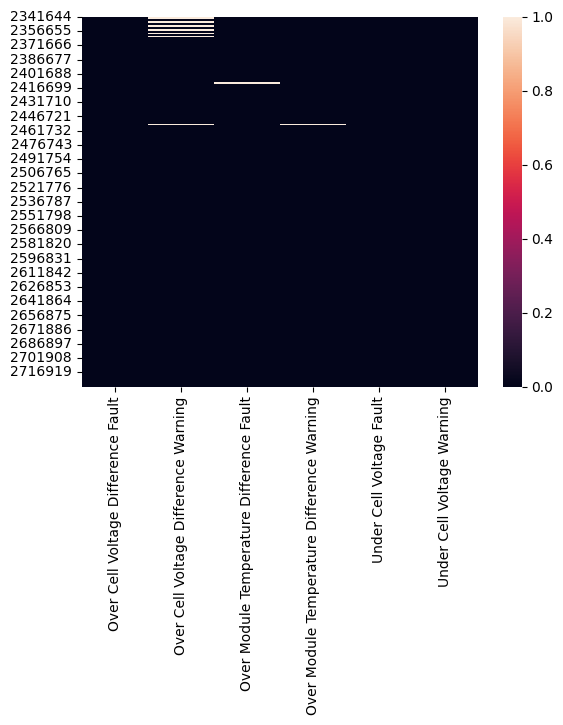

In [61]:
temp_df = df[df['Racks'] == 'racks_6'].loc[:, target_evt_list]
sns.heatmap(data=temp_df)

plt.show()